<h1 style=text-align:center>Linear Function Approximation</h1>

# Dependencies and settings

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np 
import matplotlib.pyplot as plt

2022-01-07 17:19:32.864550: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-07 17:19:32.864754: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
sample_num = 1000 # number of sample
val_ratio = 0.2 # 20% of total sample as validation set
test_ratio = 0.2 # 20% of total sample as test set

In [3]:
def generate_dataset_simple(beta, n, std_dev):
  x = np.random.random_sample(n) * 100
  e = np.random.randn(n) * std_dev
  y = x * beta + e
  # We need to reshape x to be a 2-d matrix with n rows and 1 column
  # This is so that it can take a generalized form that can be expanded
  # to multiple predictors for the `LinearRegression` model
  return x.reshape(n, 1), y

In [4]:

x_val, y_val = generate_dataset_simple(10, 1000, 100)

In [5]:
# dataset split into training, validation, and test sets

val_split = int(val_ratio * sample_num)
test_split = int(val_split + (test_ratio * sample_num))
x_val, x_test, x_train = np.split(x_val, [val_split, test_split])
y_val, y_test, y_train = np.split(y_val, [val_split, test_split])

# Check that our splits add up correctly
assert(x_train.size + x_val.size + x_test.size) == sample_num

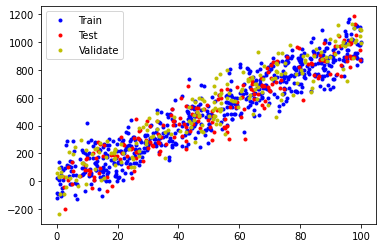

In [6]:
# visualization of training, validation, and test sets
plt.figure(1)
plt.plot(x_train, y_train, 'b.', label = 'Train')
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_val, y_val, 'y.', label="Validate")
plt.legend()
plt.show()

In [7]:
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(1,)))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 50)                850       
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 933
Trainable params: 933
Non-trainable params: 0
_________________________________________________________________


2022-01-07 17:19:40.496425: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-01-07 17:19:40.496793: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-07 17:19:40.496869: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-01-07 17:19:40.496930: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-01-07 17:19:40.529118: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [8]:
model.compile(optimizer = 'adam', loss = 'mse', metrics=['mae'])
history = model.fit(x_train, y_train, epochs=500, batch_size=100, validation_data=(x_val, y_val), verbose=0)

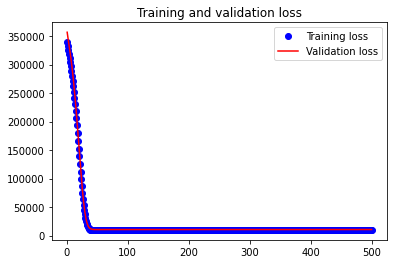

In [9]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

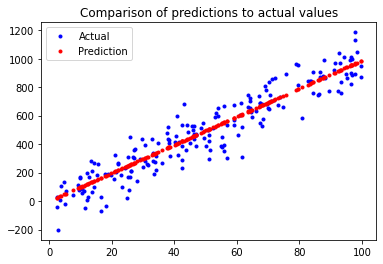

In [10]:
# Plot predictions against actual values
predictions = model.predict(x_test)

plt.clf()
plt.title("Comparison of predictions to actual values")
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Prediction')
plt.legend()
plt.show()